In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import pandas as pd
import os
from tensorflow import keras
import IPython.display as ipd
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline

In [2]:
from tensorflow import keras
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
root_path="C:/Users/sarib/Desktop/Gohm/SpeechRecognition/database"

In [183]:
class prefit(tf.keras.utils.Sequence):
    paths=[]
    worddict = {
            "ac": 0,
            "asagi": 1,
            "baslat": 2,
            "devam": 3,
            "dur": 4,
            "evet": 5,
            "geri":6,
            "hayir": 7,
            "ileri": 8,
            "iptal": 9,
            "kapa":10,
            "sag":11,
            "sol": 12,
            "yukari":13

            }

    def __init__(self, path):
        self.shuffle=True
        self.path = path
        for root, directories, files in os.walk(self.path):
            for file_names in files:
                if root is not root_path:
                    self.paths.append(os.path.join(root,file_names))
        
    def __get_spectrogram(self,path):
        signal, sample_rate = librosa.load(path)
        ipd.Audio(path)
        melspectrogram = librosa.feature.melspectrogram(signal)
        S_DB = librosa.power_to_db(melspectrogram, ref=np.max)
        return S_DB

   
    def __getitem__(self, index):

        #labelY=[]
        data = self.__get_spectrogram(self.paths[index])
        
        #print(self.paths[index])
        #print("data: ", data[0])
        labelY=os.path.basename(os.path.dirname(self.paths[index]))
        print(np.max(data))
        #normalized_arr = preprocessing.normalize(data)
        #print("normalized: ",normalized_arr)
        #extracted_feataures=[]
        #extracted_feataures.append([data,labelY])
        #extracted_feataures_dataframe= pd.DataFrame(extracted_feataures, columns=["melspectrogram", "word"])
        #X=np.array(extracted_feataures_dataframe['melspectrogram'].tolist())
        x_arr=[]
        X = np.empty((0,128, 44))
        #x_arr = np.array(data)
        x_arr.append(data)
        x_arr= np.array(x_arr)
        #print("x_arr",x_arr.shape)
        X = np.concatenate((X, x_arr))
        #getclasses=tuple(len(extracted_feataures_dataframe.groupby("word")["word"]))
        y = np.empty((0,14), dtype=int)
        y_class = keras.utils.to_categorical(self.worddict[labelY], num_classes=14) #TODO: worde göre yapılacak
        y_data = []
        y_data.append(y_class)
        y = np.concatenate((y, np.array(y_data)))
        print("X: ", X[0].shape, "y: ",y)
        return X, y


    def on_epoch_end(self):
        """if self.shuffle:
            np.random.shuffle(self.paths)"""
        pass

    def __len__(self):
        return len(self.paths)
        #pass

In [184]:
prefit_data = prefit(path=root_path)

In [180]:
prefit_data[0]

1.9073486e-06
X:  (128, 44) y:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(array([[[-80., -80., -80., ..., -80., -80., -80.],
         [-80., -80., -80., ..., -80., -80., -80.],
         [-80., -80., -80., ..., -80., -80., -80.],
         ...,
         [-80., -80., -80., ..., -80., -80., -80.],
         [-80., -80., -80., ..., -80., -80., -80.],
         [-80., -80., -80., ..., -80., -80., -80.]]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [155]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,44,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(14,activation='softmax'))
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=0.001))
    return model

In [72]:
model=create_model()

In [186]:
checkpointpath="checkpointx/cp.ckpt"
checkpointer = ModelCheckpoint(checkpointpath, monitor='accuracy',
                               verbose=2, save_best_only=True, mode='max')

history=model.fit(prefit_data, epochs=10, steps_per_epoch=100, callbacks=[checkpointer], verbose=1)

1.9073486e-06
X:  (128, 44) y:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Epoch 1/10
0.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
  1/100 [..............................] - ETA: 1:06 - loss: 2.6657 - accuracy: 0.0000e+000.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
  2/100 [..............................] - ETA: 8s - loss: 2.6676 - accuracy: 0.0000e+00  0.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
  3/100 [..............................] - ETA: 8s - loss: 2.6566 - accuracy: 0.0000e+000.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
  4/100 [>.............................] - ETA: 8s - loss: 2.6449 - accuracy: 0.0000e+000.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
  5/100 [>.............................] - ETA: 8s - loss: 2.6488 - accuracy: 0.0000e+000.0
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
  6/100 [>.............................] - ETA: 8s - loss: 

KeyboardInterrupt: 

1.9073486e-06
X:  (128, 44) y:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


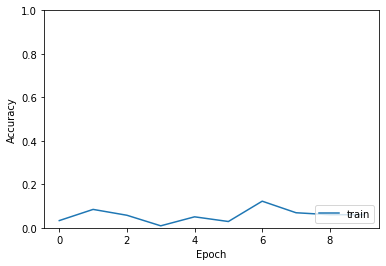

In [20]:
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [21]:
print("Test Score: ", model.evaluate(data))

    5/26442 [..............................] - ETA: 9:24:23 - loss: 2.6384 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [23]:
model.load_weights(checkpointpath)

In [ ]:
print("Test Score: ", model.evaluate(data))

ADDING SECOND DATASET

In [ ]:
pt2=os.path.join(root_path,"dataset2")
data2 = prefit(path=pt2)

In [ ]:
history=model.fit(data2, epochs=10, verbose=2)

Epoch 1/10
10/10 - 4s - loss: 146.7196 - accuracy: 0.0000e+00 - 4s/epoch - 386ms/step
Epoch 2/10
10/10 - 5s - loss: 4.4903 - accuracy: 0.0000e+00 - 5s/epoch - 467ms/step
Epoch 3/10
10/10 - 4s - loss: 2.8922 - accuracy: 0.1374 - 4s/epoch - 444ms/step
Epoch 4/10
10/10 - 5s - loss: 2.6725 - accuracy: 0.0060 - 5s/epoch - 505ms/step
Epoch 5/10
10/10 - 5s - loss: 2.9794 - accuracy: 0.0959 - 5s/epoch - 549ms/step
Epoch 6/10
10/10 - 6s - loss: 2.7908 - accuracy: 0.0000e+00 - 6s/epoch - 591ms/step
Epoch 7/10
10/10 - 6s - loss: 2.6360 - accuracy: 0.0988 - 6s/epoch - 599ms/step
Epoch 8/10
10/10 - 6s - loss: 2.6354 - accuracy: 0.2022 - 6s/epoch - 643ms/step
Epoch 9/10
10/10 - 7s - loss: 2.6410 - accuracy: 0.0997 - 7s/epoch - 678ms/step
Epoch 10/10
10/10 - 7s - loss: 2.6389 - accuracy: 0.1009 - 7s/epoch - 690ms/step


In [ ]:
print("Test Score: ", model.evaluate(data))

10/10 [==============================] - 3s 238ms/step - loss: 2.6375 - accuracy: 0.0000e+00
Test Score:  [2.6375293731689453, 0.0]


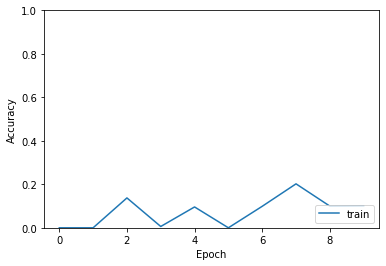

In [ ]:
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [22]:
inverse_worddict=dict((v, k) for k, v in data.worddict.items())

In [23]:
def get_spectrogram(path):
    signal, sample_rate = librosa.load(path)
    ipd.Audio(path)
    melspectrogram = librosa.feature.melspectrogram(signal)
    S_DB = librosa.power_to_db(melspectrogram, ref=np.max)
    return S_DB

In [24]:
predictiondata_feataures =[]
counter_true=0
for root, directories, files in os.walk("C:/Users/sarib/Desktop/Gohm/SpeechRecognition/RecordsFromDataset"): 
    for file_names in files:
        if root is not root_path:
            #print(os.path.join(root,file_names) )
            r = get_spectrogram(os.path.join(root,file_names))
            #rl=r.reshape(1,-1)
            rl = r[np.newaxis, ...]
            predicted_label=tuple(np.argmax(model.predict(rl), axis=1))
            prediction_class = inverse_worddict[predicted_label[0]]
            predictiondata_feataures.append([os.path.basename(os.path.normpath(root)),prediction_class,predicted_label[0]])
            if os.path.basename(os.path.normpath(root))==prediction_class:
                counter_true+=1

In [25]:
predictiondata_feataures_dataframe= pd.DataFrame(predictiondata_feataures, columns=["actual data", "predicted data", "predicted label"])
percentage= (counter_true/len(predictiondata_feataures))*100
print("The percantage of the true predicted data: ", percentage,"%")
predictiondata_feataures_dataframe

The percantage of the true predicted data:  7.142857142857142 %


,actual data,predicted data,predicted label
0,ac,kapa,10
1,ac,kapa,10
2,ac,kapa,10
3,asagi,kapa,10
4,asagi,iptal,9
5,asagi,iptal,9
6,baslat,kapa,10
7,baslat,iptal,9
8,baslat,kapa,10
9,devam,kapa,10
